# 6.2 - Taking the Human Back into the Loop

Author: Jaan Tollander de Balsch

In [13]:
import numpy as np
from GPyOpt.methods import BayesianOptimization
import matplotlib.pyplot as plt

In [14]:
def f(x):
    """The function to optimize.

    Parameters
    ----------
    x : np.ndarray
        1 dimensional array of 3 item representing the values `(r,g,b)` of rgb
        color.

    Returns
    -------
        int:
        The user given grade for the color `x`.
    """
    im = x.reshape(1, 1, 3).repeat(3, axis=0).repeat(3, axis=1)
    plt.figure(1)
    plt.title(f"RGB: {x.ravel()}")
    plt.imshow(im)
    plt.show(block=False)
    while True:
        res = input('Grade? (0 to 5) ')
        if res in ['0', '1', '2', '3', '4', '5']:
            res = int(res)
            plt.close(1)
            return res

In [20]:
def g(x):
    """Grayscale"""
    return f(np.array([x, x, x], dtype=np.int64))

The bayesian optimization for finding the favorite color. Due to simplicity, the grayscale was used instead of the whole RGB space which would be much larger, $255$ vs $255^3$ colors. This also makes interpreting the results easier.

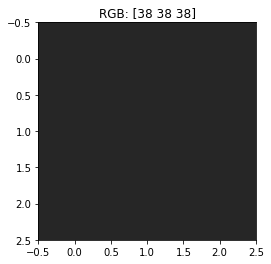

Grade? (0 to 5)  2


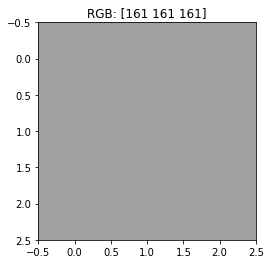

Grade? (0 to 5)  5


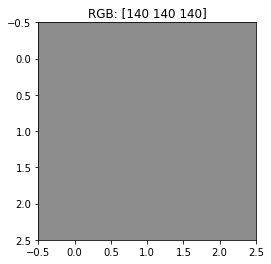

Grade? (0 to 5)  5


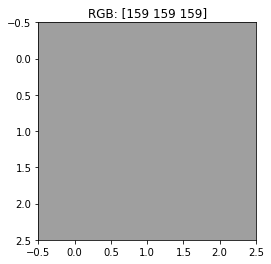

Grade? (0 to 5)  5


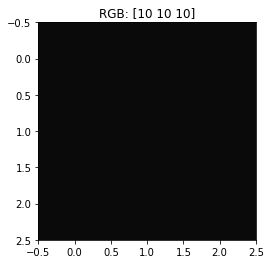

Grade? (0 to 5)  2


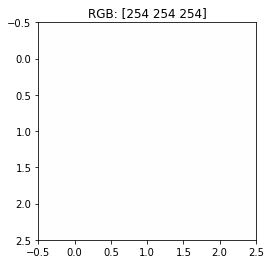

Grade? (0 to 5)  1


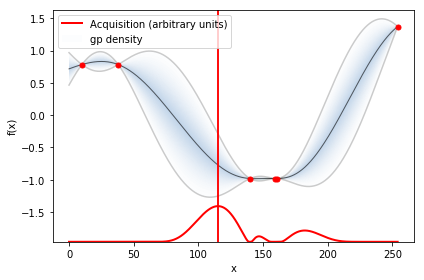

In [21]:
domain = [{'name': 'rgb',
           'type': 'discrete',
           'domain': list(range(0, 255))}]
opt = BayesianOptimization(g, domain=domain, exact_feval=True, maximize=True)
opt.run_optimization(max_iter=1)
opt.plot_acquisition()

The favourite color is displayed in the cell below.

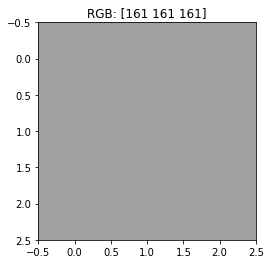

In [24]:
opt_color = np.array([opt.x_opt]*3, dtype=np.int64)
im = opt_color.reshape(1, 1, 3).repeat(3, axis=0).repeat(3, axis=1)
plt.figure(1)
plt.title(f"RGB: {opt_color.ravel()}")
plt.imshow(im)
plt.show()

The optimization works if the user has real, genuine preferred color. In the example above, light grayish colors were preferred which resulted the optimal solution being light gray, i.e. rgb values near $(150,150,150)$. The main challence of this system is that can be very hard for user to give an absolute rating of a specific color. It would be easier to give relative anwers, such as displaying two colors side by side and asking which one the user preferres more.